In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Movimentações

In [3]:
#Sources do projeto
from src.utils.data import getMovimentacoesData as movimenta
from src.utils.data import getTerminaisData as terminais

movimentacao = movimenta.carregaMovimentacao()
terminaisSantos = terminais.carregaTerminais()

movimentacaoGeo = pd.merge(movimentacao, terminaisSantos,on='Terminal', how='left' )
movimentacaoGeo['Data'] = pd.to_datetime(movimentacaoGeo['Data'])
display(movimentacaoGeo)
movimentacaoGeo.info()

,Ano,Mes,Berco,TipoInstalacao,Terminal,PerfilCarga,TipoOperacao,Navegacao,SentidoCarga,Carga,...,TEUs,Unidades,Data,TerminalAjustado,Latitude,Longitude,Local,Tipo,Tamanho,TerminalUni
0,2005,1,SABOO 1,PORTO ORGANIZADO,OUTROS,CARGA GERAL,CONVENCIONAL,LONGO CURSO,DESEMBARQUE,VEÍCULOS,...,0.0,2.0,2005-01-01,OUTROS,NaN,NaN,NaN,NaN,NaN,NaN
1,2005,1,ARM 30,PORTO ORGANIZADO,DEICMAR,CARGA GERAL,CONVENCIONAL,LONGO CURSO,EMBARQUE,OUTRAS MERCADORIAS,...,0.0,81.0,2005-01-01,BANDEIRANTES-DEICMAR,-23.949703,-46.312914,Direita,Carga Geral,NaN,NaN
2,2005,1,ARM 30,PORTO ORGANIZADO,RODRIMAR,CARGA GERAL,CONVENCIONAL,LONGO CURSO,EMBARQUE,OUTRAS MERCADORIAS,...,0.0,12.0,2005-01-01,RODRIMAR,NaN,NaN,NaN,NaN,NaN,NaN
3,2005,1,ARM 15,PORTO ORGANIZADO,OUTROS,CARGA GERAL,CONVENCIONAL,LONGO CURSO,EMBARQUE,OUTRAS MERCADORIAS,...,0.0,46.0,2005-01-01,OUTROS,NaN,NaN,NaN,NaN,NaN,NaN
4,2005,1,SABOO 3,PORTO ORGANIZADO,TRANSBRASA,CARGA GERAL,CONVENCIONAL,LONGO CURSO,EMBARQUE,OUTRAS MERCADORIAS,...,0.0,1.0,2005-01-01,TRANSBRASA,-23.946682,-46.341746,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337815,2023,6,TECON 3,PORTO ORGANIZADO,SANTOS BRASIL -,CARGA CONTEINERIZADA,OUTROS,LONGO CURSO,DESCARGA REMOCAO,SEM CARGAS,...,6.0,3.0,2023-06-01,SANTOS BRASIL,NaN,NaN,NaN,NaN,NaN,NaN
337816,2023,6,TECON 3,PORTO ORGANIZADO,SANTOS BRASIL -,CARGA CONTEINERIZADA,OUTROS,LONGO CURSO,EMBARQUE REMOCAO,OUTRAS MERCADORIAS,...,2.0,1.0,2023-06-01,SANTOS BRASIL,NaN,NaN,NaN,NaN,NaN,NaN
337817,2023,6,TECON 3,PORTO ORGANIZADO,SANTOS BRASIL -,CARGA CONTEINERIZADA,OUTROS,LONGO CURSO,EMBARQUE,OUTRAS MERCADORIAS,...,1.0,1.0,2023-06-01,SANTOS BRASIL,NaN,NaN,NaN,NaN,NaN,NaN
337818,2023,6,TECON 3,PORTO ORGANIZADO,SANTOS BRASIL -,CARGA CONTEINERIZADA,OUTROS,LONGO CURSO,EMBARQUE,OUTRAS MERCADORIAS,...,22.0,11.0,2023-06-01,SANTOS BRASIL,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 337820 entries, 0 to 337819
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Ano               337820 non-null  int64         
 1   Mes               337820 non-null  int64         
 2   Berco             337820 non-null  object        
 3   TipoInstalacao    337820 non-null  object        
 4   Terminal          332439 non-null  object        
 5   PerfilCarga       337820 non-null  object        
 6   TipoOperacao      337820 non-null  object        
 7   Navegacao         337820 non-null  object        
 8   SentidoCarga      337820 non-null  object        
 9   Carga             337820 non-null  object        
 10  Toneladas         337820 non-null  float64       
 11  TEUs              302102 non-null  float64       
 12  Unidades          302102 non-null  float64       
 13  Data              337820 non-null  datetime64[ns]
 14  Term

# 1. Análise Geral do Volumes

### Análise Temporal da Movimentação de Cargas
**Hipótese 1:** O crescimento do volume total de carga movimentado oscilou ao longo dos anos e tem tendência de crescimento.
- Visualização 1: Gráfico de linhas com a evolução das toneladas movimentadas anualmente e mensalmente.
- Visualização 2: Gráfico de barras com a variação vs ano anterior.

In [4]:
# Agrupando os dados por Data
grpMov = movimentacaoGeo.groupby(['Data']).agg(Toneladas=('Toneladas','sum')).reset_index()
grpMov['Média Móvel 12 Meses'] = grpMov['Toneladas'].rolling(window=12).mean()
grpMov['Acumulado_12_Meses'] = grpMov['Toneladas'].rolling(window=12).sum()
grpMov['Acumulado_12_Meses_Ano_Anterior'] = grpMov['Acumulado_12_Meses'].shift(12)
grpMov['Toneladas YoY %'] = ((grpMov['Acumulado_12_Meses'] / grpMov['Acumulado_12_Meses_Ano_Anterior']) - 1) * 100
display(grpMov)

# Gráfico de linha com a evolução do volume movimentado e a média móvel de 12 meses
fig = px.line(grpMov, x='Data', y=['Toneladas','Média Móvel 12 Meses'])
fig.update_layout(
    title='Evolução da Carga Movimentada',
    xaxis_tickfont_size=14,
    yaxis=dict(title='Toneladas', titlefont_size=16, tickfont_size=14),
    xaxis=dict(title='Ano', titlefont_size=16, tickfont_size=14),
    width=900,
    height=600)
fig.show()

fig = px.bar(grpMov, x='Data', y='Toneladas YoY %', 
             title='Variação da Carga Movimentada vs Ano Anterior (YoY %)')
fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Variação vs Ano Anterior (YoY %)',
    width=900,
    height=600)
fig.show()

,Data,Toneladas,Média Móvel 12 Meses,Acumulado_12_Meses,Acumulado_12_Meses_Ano_Anterior,Toneladas YoY %
0,2005-01-01,5027935.92,NaN,NaN,NaN,NaN
1,2005-02-01,5316604.84,NaN,NaN,NaN,NaN
2,2005-03-01,5899909.25,NaN,NaN,NaN,NaN
3,2005-04-01,5850636.36,NaN,NaN,NaN,NaN
4,2005-05-01,6826361.03,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
218,2023-03-01,15173723.57,1.332424e+07,1.598909e+08,1.505079e+08,6.234195
219,2023-04-01,13582913.13,1.330674e+07,1.596808e+08,1.505412e+08,6.071186
220,2023-05-01,14997675.07,1.337009e+07,1.604411e+08,1.506931e+08,6.468714
221,2023-06-01,15458730.73,1.347958e+07,1.617550e+08,1.515711e+08,6.718905


### Comparação com o PIB, Indústria, Serviços e Agro

In [5]:
# Carregando os dados de PIB
dfPIB = pd.read_excel('./Data/raw/Tab_Compl_CNT_1T24.xls', sheet_name='Acum. em 4 trimestres', header=2)
# Acertando os rótulos
new_header = []
for col1, col2 in zip(dfPIB.iloc[0], dfPIB.columns):
    if pd.isna(col1) or col1=='Total':
        new_header.append(col2)
    else:
        new_header.append(col1)
dfPIB.columns = new_header
dfPIB = dfPIB.rename(columns={'Unnamed: 6': 'INDÚSTRIA', 'Unnamed: 14': 'SERVIÇOS'})
dfPIB.drop(0, axis=0, inplace=True)
# Converte o trimestre em algarismo romano em data
de_para = {'.I': '03', '.II': '06', '.III': '09', '.IV': '12'}
dfPIB['Data'] = [f"{row['Período'][:4]}-{de_para[row['Período'][4:]]}-01" 
                        if row['Período'][4:] in de_para.keys() 
                        else row['Período']                        
                        for _, row in dfPIB.iterrows()]
dfPIB['Data'] = pd.to_datetime(dfPIB['Data'])
dfPIB

,Período,AGROPECUÁRIA,Indústrias extrativas,Indústrias de transformação,"Eletricidade e gás, água, esgoto, ativ. de gestão de resíduos",Construção,INDÚSTRIA,Comércio,"Transporte, armazenagem e correio",Informação e comunicação,...,SERVIÇOS,VA,Imposto,PIB,Consumo das Famílias,Consumo do Governo,Formação Bruta de Capital Fixo,Exportação,Importação,Data
1,1996.I,-1.939268,2.308617,1.294756,0.353302,-6.239991,-0.640666,2.933048,9.446427,8.42335,...,5.157726,3.117975,-1.867877,2.519687,2.490209,-0.164497,-9.163045,11.214702,-1.941357,1996-03-01
2,1996.II,-1.690557,6.450267,-2.569572,2.149212,-4.432123,-2.268492,0.372746,8.778083,8.206447,...,5.37774,2.828852,-2.970004,2.135612,2.586754,-0.695963,-9.787323,7.027412,-7.136561,1996-06-01
3,1996.III,-3.653437,5.434815,0.260902,2.882425,-0.529296,0.502742,1.358943,6.782862,7.02375,...,4.034315,2.588476,0.282683,2.309147,3.333088,-0.765618,-4.389979,0.624131,-2.800834,1996-09-01
4,1996.IV,2.953171,2.438054,0.080221,3.117207,2.214038,0.974617,1.813372,5.618101,5.96362,...,2.299138,1.979059,3.683153,2.208864,3.236581,-1.825740,1.195521,-0.419864,5.594315,1996-12-01
5,1997.I,4.09565,1.668903,2.576617,3.942278,4.825471,3.277388,4.0569,4.684977,5.289518,...,2.105901,2.530792,7.551253,3.177833,5.452021,-0.726135,7.428623,-1.589057,15.839967,1997-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,2023.I,8.234559,0.543912,0.736654,10.335454,5.4184,2.461227,1.662635,7.775695,5.237632,...,4.130279,3.772448,3.182391,3.696417,4.684551,1.325589,2.970600,5.434653,4.132165,2023-03-01
110,2023.II,14.510049,3.494828,0.587582,8.331273,3.365796,2.442949,1.210781,6.572577,5.143933,...,3.629456,3.765359,3.001046,3.675879,4.091290,1.437500,2.026226,9.803274,4.442884,2023-06-01
111,2023.III,14.387093,6.256101,-0.242385,7.399771,0.503018,1.996781,0.834988,4.559321,3.984859,...,2.82558,3.144211,2.492468,3.071692,3.718346,0.967112,-1.088312,10.272329,-0.066984,2023-09-01
112,2023.IV,15.120991,8.690443,-1.306257,6.51851,-0.456441,1.593881,0.627449,2.628368,2.638815,...,2.394327,3.030445,2.115196,2.908480,3.122177,1.670339,-3.004757,9.136176,-1.190279,2023-12-01


In [6]:
# Juntando as 2 tabelas
grpMovTri = pd.merge(grpMov, dfPIB[['Data', 'PIB', 'AGROPECUÁRIA', 'INDÚSTRIA', 'SERVIÇOS']], 
                     how='inner', on='Data')
grpMovTri = grpMovTri.astype({'AGROPECUÁRIA': float, 'INDÚSTRIA': float, 'SERVIÇOS': float})
grpMovTri

,Data,Toneladas,Média Móvel 12 Meses,Acumulado_12_Meses,Acumulado_12_Meses_Ano_Anterior,Toneladas YoY %,PIB,AGROPECUÁRIA,INDÚSTRIA,SERVIÇOS
0,2005-03-01,5899909.25,NaN,NaN,NaN,NaN,5.818642,2.898141,7.441677,5.296827
1,2005-06-01,6974473.22,NaN,NaN,NaN,NaN,5.355624,3.001650,6.532896,4.959225
2,2005-09-01,6045105.53,NaN,NaN,NaN,NaN,4.212248,1.322629,3.878163,4.529540
3,2005-12-01,5373384.74,6.139973e+06,7.367967e+07,NaN,NaN,3.202135,1.120066,1.994390,3.660634
4,2006-03-01,5853510.32,6.099896e+06,7.319875e+07,NaN,NaN,3.234993,0.372808,1.807413,3.688182
...,...,...,...,...,...,...,...,...,...,...
69,2022-06-01,14144792.93,1.263092e+07,1.515711e+08,1.523281e+08,-0.496986,2.666728,-3.115718,-0.880499,4.482452
70,2022-09-01,13628564.28,1.315541e+07,1.578649e+08,1.494060e+08,5.661655,2.710378,0.420658,-0.558072,4.295907
71,2022-12-01,12096273.73,1.354161e+07,1.624993e+08,1.470350e+08,10.517395,3.016694,-1.125586,1.520832,4.256687
72,2023-03-01,15173723.57,1.332424e+07,1.598909e+08,1.505079e+08,6.234195,3.696417,8.234559,2.461227,4.130279


,Toneladas YoY %,PIB,AGROPECUÁRIA,INDÚSTRIA,SERVIÇOS
Toneladas YoY %,1.000000,0.230542,0.345649,0.310042,0.148261
PIB,0.230542,1.000000,0.290094,0.927837,0.963924
AGROPECUÁRIA,0.345649,0.290094,1.000000,0.300854,0.144163
INDÚSTRIA,0.310042,0.927837,0.300854,1.000000,0.811319
SERVIÇOS,0.148261,0.963924,0.144163,0.811319,1.000000


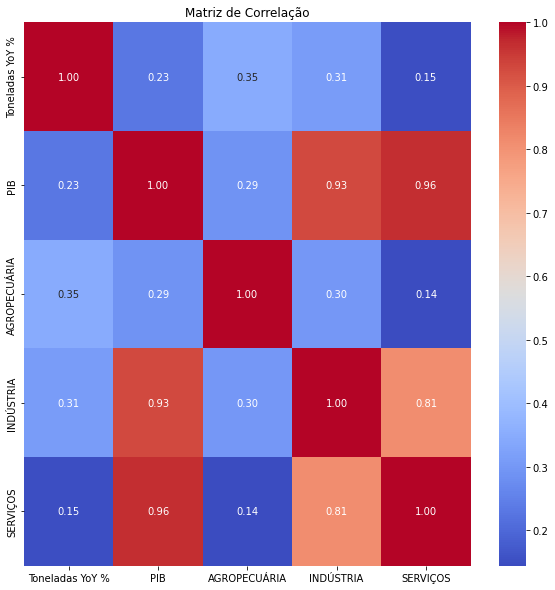

In [7]:
# Visão do ano fechado
fig = px.line(grpMovTri, x='Data', y=['Toneladas YoY %', 'PIB', 'AGROPECUÁRIA', 'INDÚSTRIA', 'SERVIÇOS'], 
             title='Variação da Carga Movimentada vs Ano Anterior (YoY %) e Indicadores Macroeconômicos')
fig.update_layout(
    xaxis_title='Ano',
    yaxis_title='Variação vs Ano Anterior (YoY %)',
    width=900,
    height=600)
fig.show()

# Matriz de correlação
matriz_corr = grpMovTri[['Toneladas YoY %', 'PIB', 'AGROPECUÁRIA', 'INDÚSTRIA', 'SERVIÇOS']].corr()
display(matriz_corr)

# Plotando a matriz de correlação
plt.figure(figsize=(10, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlação', fontsize=12)
plt.show()

fig = px.scatter_matrix(grpMovTri, dimensions=grpMovTri[['Toneladas YoY %', 'PIB', 'AGROPECUÁRIA', 'INDÚSTRIA', 'SERVIÇOS']],
                        color=grpMovTri['Data'].dt.year,# hover_name='Toneladas'
                        title="Matriz de Scatterplots")
fig.update_traces(diagonal_visible=False)  # Ocultar os gráficos na diagonal, se desejado
fig.update_layout(
    coloraxis_colorbar=dict(title="Ano"),
    height=900, width=900)   # Ajustar o tamanho do layout
fig.show()

### Análise de Sazonalidade
**Hipótese 2:** Os volumes variam conforme os meses e pode ter mudado ao longo do tempo.
- Visualização: Gráfico de área por mês comparando os últimos anos, incluindo o período impactado pela pandemia.

In [8]:
# Filtrando os dados dos últimos anos e agrupando por ano, mês e perfil de carga
grpMov = movimentacaoGeo.query('(Ano>=2018 & Ano<=2022)').groupby(['Ano', 'Mes', 'PerfilCarga']).agg(
    Toneladas=('Toneladas','sum'), 
    TEUs=('TEUs','sum'), Unidades=('Unidades','sum')
    ).reset_index()

# Plotando o gráfico de áreas usando Plotly Express
fig = px.area(grpMov, x='Mes', y='Toneladas', color='PerfilCarga', facet_col='Ano',
              labels={'Mes': 'Mês', 'Toneladas': 'Toneladas', 'PerfilCarga': 'Perfil Carga'},
              title='Volume de Carga Movimentada por Mês e Tipo de Carga')

fig.update_layout(
    xaxis_tickfont_size=14,
    yaxis=dict(title='Toneladas', titlefont_size=16, tickfont_size=14),
    width=1200,
    height=500)

# Atualizando os rótulos do eixo x com os nomes dos meses
fig.update_xaxes(tickvals=np.arange(1, 13), ticktext=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun',
                                                      'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

fig.show()

---
# 2. Análise de Cargas

### Evolução do Perfil de Carga
**Hipótese 3:** Certos tipos de carga estão crescendo em participação no volume de carga movimentada.
- Visualização: Gráfico de barras empilhadas com a evolução dos volumes movimentados em valor absoluto de toneladas e em %.

In [9]:
# Agrupando por PerfilCarga
grpMov = movimentacaoGeo.assign(
    result1=np.where(movimentacaoGeo['PerfilCarga']=='GRANEL SOLIDO', movimentacaoGeo['Toneladas'], 0),
    result2=np.where(movimentacaoGeo['PerfilCarga']=='CARGA CONTEINERIZADA', movimentacaoGeo['Toneladas'], 0),
    result3=np.where(movimentacaoGeo['PerfilCarga']=='GRANEL LIQUIDO', movimentacaoGeo['Toneladas'], 0),
    result4=np.where(movimentacaoGeo['PerfilCarga']=='CARGA GERAL', movimentacaoGeo['Toneladas'], 0),
).groupby('Ano').agg(
    Toneladas=('Toneladas','sum'),
    Toneladas_Granel_Sólido=('result1','sum'),
    Toneladas_Carga_Conteinerizada=('result2','sum'),
    Toneladas_Granel_Líquido=('result3','sum'),
    Toneladas_Carga_Geral=('result4','sum')
    ).reset_index()
# Adicionando colunas em %
grpMov['Toneladas_Granel_Sólido_%'] = grpMov['Toneladas_Granel_Sólido'] / grpMov['Toneladas']
grpMov['Toneladas_Carga_Conteinerizada_%'] = grpMov['Toneladas_Carga_Conteinerizada'] / grpMov['Toneladas']
grpMov['Toneladas_Granel_Líquido_%'] = grpMov['Toneladas_Granel_Líquido'] / grpMov['Toneladas']
grpMov['Toneladas_Carga_Geral_%'] = grpMov['Toneladas_Carga_Geral'] / grpMov['Toneladas']
grpMov.head()

# Gráfico de barras empilhadas em valor absoluto
fig = px.bar(grpMov, x='Ano', 
             y=['Toneladas_Granel_Sólido',
                'Toneladas_Carga_Conteinerizada', 
                'Toneladas_Granel_Líquido',
                'Toneladas_Granel_Líquido',
                'Toneladas_Carga_Geral'])
fig.update_layout(
    title='Evolução da Carga Movimentada por Perfil de Carga',
    xaxis_tickfont_size=14,
    yaxis=dict(title='Toneladas', titlefont_size=16, tickfont_size=14),
    xaxis=dict(title='Ano', titlefont_size=16, tickfont_size=14),
    width=900,
    height=500)
fig.show()

# Gráfico de barras empilhadas em %
fig = px.bar(grpMov, x='Ano', 
             y=['Toneladas_Granel_Sólido_%',
                'Toneladas_Carga_Conteinerizada_%', 
                'Toneladas_Granel_Líquido_%',
                'Toneladas_Granel_Líquido_%',
                'Toneladas_Carga_Geral_%'])
fig.update_layout(
    title='Evolução da Carga Movimentada por Perfil de Carga em %',
    xaxis_tickfont_size=14,
    yaxis=dict(title='Toneladas', titlefont_size=16, tickfont_size=14),
    xaxis=dict(title='Ano', titlefont_size=16, tickfont_size=14),
    width=900,
    height=500)
fig.show()


### Fluxo da Carga Movimentada por Carga
**Hipótese 4:** Fluxo de cargas conforme tipo de instalação, sentido da carga, navegação, perfil e carga.
- Visualização: Coordenadas Paralelas com o fluxo conforme as variáveis.

In [10]:
grpMov = movimentacaoGeo.query('Ano==2022').groupby(['TipoInstalacao', 'PerfilCarga', 'TipoOperacao', 
    'Navegacao', 'SentidoCarga', 'Carga']).agg(
    Qtd=('Data','count'), Toneladas=('Toneladas','sum'), 
    TEUs=('TEUs','sum'), Unidades=('Unidades','sum')
    ).reset_index().sort_values(by=['TipoInstalacao', 'PerfilCarga', 'TipoOperacao', 
    'Navegacao', 'SentidoCarga', 'Carga'])
grpMov

,TipoInstalacao,PerfilCarga,TipoOperacao,Navegacao,SentidoCarga,Carga,Qtd,Toneladas,TEUs,Unidades
0,FORA DO PORTO ORGANIZADO,CARGA CONTEINERIZADA,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,AÇÚCAR,17,4253.08,288.0,144.0
1,FORA DO PORTO ORGANIZADO,CARGA CONTEINERIZADA,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,CARNES,20,1396.08,101.0,59.0
2,FORA DO PORTO ORGANIZADO,CARGA CONTEINERIZADA,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,"COMBUSTÍVEIS, ÓLEOS E PRODUTOS M",1,45.79,4.0,2.0
3,FORA DO PORTO ORGANIZADO,CARGA CONTEINERIZADA,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,FERTILIZANTES,1,419.50,14.0,14.0
4,FORA DO PORTO ORGANIZADO,CARGA CONTEINERIZADA,CONVENCIONAL,CABOTAGEM,DESEMBARQUE,OUTRAS MERCADORIAS,53,557501.83,57461.0,29453.0
...,...,...,...,...,...,...,...,...,...,...
434,PORTO ORGANIZADO,GRANEL SOLIDO,CONVENCIONAL,LONGO CURSO,EMBARQUE,GRÃOS E FARELO,190,44813324.95,0.0,0.0
435,PORTO ORGANIZADO,GRANEL SOLIDO,CONVENCIONAL,LONGO CURSO,EMBARQUE,OUTRAS MERCADORIAS,4,9001.44,0.0,0.0
436,PORTO ORGANIZADO,GRANEL SOLIDO,CONVENCIONAL,LONGO CURSO,EMBARQUE,PETRÓLEO E DERIVADOS,14,29570.11,0.0,0.0
437,PORTO ORGANIZADO,GRANEL SOLIDO,TRANSBORDO,LONGO CURSO,DESEMBARQUE,AÇÚCAR,2,4580.58,0.0,0.0


In [11]:
# Filtrando os dados de 2022 e agrupando os dados pelas variáveis categóricas
grpMov = movimentacaoGeo.query('Ano==2005').groupby(['TipoInstalacao', 'PerfilCarga', 'TipoOperacao', 
    'Navegacao', 'SentidoCarga', 'Carga']).agg(
    Qtd=('Data','count'), Toneladas=('Toneladas','sum'), 
    TEUs=('TEUs','sum'), Unidades=('Unidades','sum')
    ).reset_index().sort_values(by=['TipoInstalacao', 'PerfilCarga', 'TipoOperacao', 
    'Navegacao', 'SentidoCarga', 'Carga'])
grpMov

# Para resolver um problema de versão do pandas e plotly
pd.DataFrame.iteritems = pd.DataFrame.items

# Gráfico de coordenadas paralelas
fig = px.parallel_categories(grpMov, 
    dimensions=['TipoInstalacao', 'Navegacao', 'SentidoCarga', 'PerfilCarga', 'Carga'],
    labels={'TipoInstalacao': 'Tipo Instalacao',
        'Navegacao': 'Navegacao',
        'SentidoCarga': 'Sentido Carga',
        'PerfilCarga': 'Perfil Carga',
        'Toneladas': 'Toneladas'},
    #color='Toneladas',
    #color_continuous_scale=px.colors.sequential.Viridis
    )
fig.update_layout(
    title='Fluxo da Carga Movimentada 2005',
    xaxis_tickfont_size=14,
        margin=dict(r=170, l=120),
    coloraxis_colorbar=dict(
        #title="Toneladas",
        x=1.2  # Move a barra de cores mais para a direita
    ),
    width=1000,
    height=600)
fig.show()

In [12]:
# Filtrando os dados de 2022 e agrupando os dados pelas variáveis categóricas
grpMov = movimentacaoGeo.query('Ano==2022').groupby(['TipoInstalacao', 'PerfilCarga', 'TipoOperacao', 
    'Navegacao', 'SentidoCarga', 'Carga']).agg(
    Qtd=('Data','count'), Toneladas=('Toneladas','sum'), 
    TEUs=('TEUs','sum'), Unidades=('Unidades','sum')
    ).reset_index().sort_values(by=['TipoInstalacao', 'PerfilCarga', 'TipoOperacao', 
    'Navegacao', 'SentidoCarga', 'Carga'])
grpMov

# Para resolver um problema de versão do pandas e plotly
pd.DataFrame.iteritems = pd.DataFrame.items

# Gráfico de coordenadas paralelas
fig = px.parallel_categories(grpMov, 
    dimensions=['TipoInstalacao', 'Navegacao', 'SentidoCarga', 'PerfilCarga', 'Carga'],
    labels={'TipoInstalacao': 'Tipo Instalacao',
        'Navegacao': 'Navegacao',
        'SentidoCarga': 'Sentido Carga',
        'PerfilCarga': 'Perfil Carga',
        'Toneladas': 'Toneladas'},
    #color='Toneladas',
    #color_continuous_scale=px.colors.sequential.Viridis
    )
fig.update_layout(
    title='Fluxo da Carga Movimentada 2022',
    xaxis_tickfont_size=14,
        margin=dict(r=170, l=120),
    coloraxis_colorbar=dict(
        #title="Toneladas",
        x=1.2  # Move a barra de cores mais para a direita
    ),
    width=1000,
    height=600)
fig.show()

In [21]:
import plotly.graph_objects as go

# Lista das top 10 cargas
listTop10 = movimentacaoGeo.query('Ano==2022').groupby(['Carga']).agg(Toneladas=('Toneladas','sum')).reset_index().nlargest(10, 'Toneladas')['Carga'].tolist()

# Filtrando os dados de 2022 e agrupando os dados pelas variáveis categóricas
grpMov = movimentacaoGeo.query('Ano==2022' and 'Carga in @listTop10').groupby(['TipoInstalacao', 'PerfilCarga', 'TipoOperacao', 
    'Navegacao', 'SentidoCarga', 'TerminalAjustado', 'Carga']).agg(
    Qtd=('Data','count'), Toneladas=('Toneladas','sum')
    ).reset_index()
grpMov

df = grpMov

# Preparar dados para o gráfico de Sankey
def prepare_sankey_data(df, cat_cols, value_col):
    nodes = []
    for col in cat_cols:
        nodes.extend(list(df[col].unique()))
    nodes = list(pd.Series(nodes).unique())
    
    node_indices = {node: i for i, node in enumerate(nodes)}
    
    sources = []
    targets = []
    values = []

    for i in range(len(cat_cols) - 1):
        source_col = cat_cols[i]
        target_col = cat_cols[i + 1]
        
        grouped_df = df.groupby([source_col, target_col])[value_col].sum().reset_index()
        
        for _, row in grouped_df.iterrows():
            sources.append(node_indices[row[source_col]])
            targets.append(node_indices[row[target_col]])
            values.append(row[value_col])

    return nodes, sources, targets, values

cat_cols = ['TipoInstalacao', 'Navegacao', 'SentidoCarga', 'PerfilCarga', 'Carga']
value_col = 'Toneladas'

nodes, sources, targets, values = prepare_sankey_data(df, cat_cols, value_col)

# Criar o gráfico de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="Fluxo de Cargas 2022", font_size=14)
fig.show()


### Volume Movimentado por Carga vs Terminal
- Visualização: headtmap do volume movimentado em Toneladas de Carga vs Terminal.

In [14]:
# Agrupando os dados de um ano fechado
grpTerminalCarga = movimentacaoGeo.query('Ano==2022').groupby(['TerminalAjustado','Carga']).agg(Toneladas=('Toneladas','sum'),).reset_index()
df = grpTerminalCarga.nlargest(30, 'Toneladas')

# Pivotar os dados para criar uma tabela de terminais vs cargas
pivot_df = df.pivot_table(values='Toneladas', index='Carga', columns='TerminalAjustado', aggfunc='sum', fill_value=0)

# Criar o heatmap
fig = px.imshow(pivot_df, 
                labels=dict(x="Terminal", y="Carga", color="Toneladas"),
                x=pivot_df.columns,
                y=pivot_df.index,
                color_continuous_scale='Viridis')

fig.update_layout(title='Volume Movimentado por Carga vs Terminais',
    width=1000, height=700)
fig.update_xaxes(tickangle=90)
fig.show()

---
# 3. Análise dos Terminais
**Hipótese 5:** Alguns terminais movimentam um volume maior de carga e perfis diferentes.
- Visualização: Gráficos de histograma, heatmap, dispersão e matriz de dispersão.


**Obs: Tentei agrupar por terminal e gerar algumas métricas, mas acho que não ajudou muito na análise. Se tivesse outros atributos dos terminais como área, etc, daria para vermos o que pode ter correlação. De qualquer forma, deixei o que eu fiz para vocês, que manjam do negócio, verem se dá para ajustar e ter alguma utilidade.**

In [15]:
# Agrupamento por Terminal com métricas novas
grpTerminal = movimentacaoGeo.query('Ano==2022').groupby('TerminalAjustado').agg(
    Toneladas=('Toneladas','sum'), Toneladas_Média=('Toneladas','mean'),
    TEUs=('TEUs','sum'), TEUs_Média=('TEUs','mean'), 
    Unidades=('Unidades','sum'), Unidades_Média=('Unidades','mean'),
    Qtd_PerfilCarga_Distinta=('PerfilCarga','nunique'),
    Qtd_Carga_Distinta=('Carga','nunique'),
    Qtd_Berço=('Berco','nunique')).reset_index().sort_values(by=['Toneladas'], ascending=False)
grpTerminal

,TerminalAjustado,Toneladas,Toneladas_Média,TEUs,TEUs_Média,Unidades,Unidades_Média,Qtd_PerfilCarga_Distinta,Qtd_Carga_Distinta,Qtd_Berço
19,OUTROS,56643788.93,74531.301224,3215.0,19.484848,56893.0,344.806061,4,13,32
4,BTP,20936366.25,4466.901269,1897689.0,404.883508,1137582.0,242.710049,2,20,3
22,SANTOS BRASIL,19654189.32,3364.867201,1988265.0,340.398048,1171874.0,200.629002,2,20,6
10,DPWORLD (EMBRAPORT),14252880.22,3641.512575,1066755.0,272.548544,2477164.0,632.898314,2,18,8
32,TGG,8789479.98,237553.512973,0.0,NaN,0.0,NaN,1,1,1
34,TRANSPETRO,6599722.71,66663.865758,0.0,NaN,0.0,NaN,1,2,2
25,TEG,5039183.83,279954.657222,0.0,NaN,0.0,NaN,1,1,2
30,TES,4455048.05,139220.251562,0.0,NaN,0.0,NaN,1,1,1
1,AGEO,3826428.09,7809.036918,0.0,NaN,0.0,NaN,2,6,3
29,TERMINAL 12A,3344951.42,278745.951667,0.0,NaN,0.0,NaN,1,1,1


In [16]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Selecionando os features numéricos
features_numericos = grpTerminal.select_dtypes(include='number').columns

# Definir o número de linhas e colunas para os subplots
num_rows = len(features_numericos) // 2 + len(features_numericos) % 2
num_cols = 2

# Criar subplot
fig = make_subplots(rows=num_rows, cols=num_cols)

# Loop nas variáveis numéricas
for i, var in enumerate(features_numericos):
    # Gráfico de histograma
    histogram = go.Histogram(x=grpTerminal[var], nbinsx=50, name=var)
    
    # Adicionar gráfico ao subplot
    row = i // num_cols + 1
    col = i % num_cols + 1
    fig.add_trace(histogram, row=row, col=col)
    
    fig.update_xaxes(title_text=var, row=row, col=col)
    fig.update_yaxes(title_text='Qtd Terminais', row=row, col=col)
    
fig.update_layout(title_text="Histogramas | Quantidade de Terminais por Volume Movimentado",
                  height=num_rows * 300, width=num_cols * 450)
fig.show()

,Toneladas,Toneladas_Média,TEUs,TEUs_Média,Unidades,Unidades_Média,Qtd_PerfilCarga_Distinta,Qtd_Carga_Distinta,Qtd_Berço
Toneladas,1.000000,0.129043,0.417171,0.357370,0.150088,-0.219643,0.607545,0.616175,0.857409
Toneladas_Média,0.129043,1.000000,-0.161622,-0.297347,-0.168710,0.287396,-0.230501,-0.267188,-0.054339
TEUs,0.417171,-0.161622,1.000000,0.970398,0.430743,-0.236419,0.206773,0.832050,0.100249
TEUs_Média,0.357370,-0.297347,0.970398,1.000000,0.283689,-0.315297,0.118395,0.847439,-0.020403
Unidades,0.150088,-0.168710,0.430743,0.283689,1.000000,0.661059,0.220770,0.427360,0.157922
Unidades_Média,-0.219643,0.287396,-0.236419,-0.315297,0.661059,1.000000,-0.084941,-0.328550,-0.095351
Qtd_PerfilCarga_Distinta,0.607545,-0.230501,0.206773,0.118395,0.220770,-0.084941,1.000000,0.586780,0.640611
Qtd_Carga_Distinta,0.616175,-0.267188,0.832050,0.847439,0.427360,-0.328550,0.586780,1.000000,0.437237
Qtd_Berço,0.857409,-0.054339,0.100249,-0.020403,0.157922,-0.095351,0.640611,0.437237,1.000000


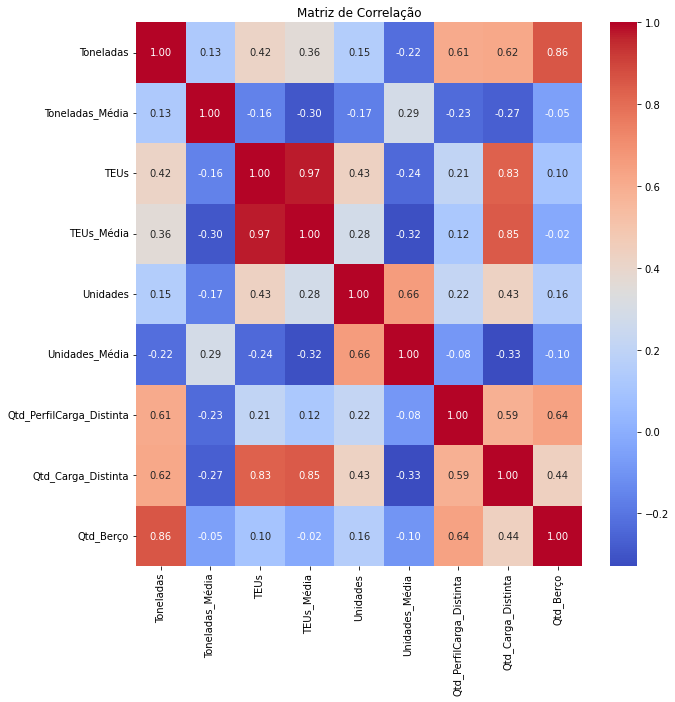

In [17]:
# Selecionando os features numéricos
features_numericos = grpTerminal.select_dtypes(include='number').columns

# Matriz de correlação
matriz_corr = grpTerminal[features_numericos].corr()
display(matriz_corr)

# Plotando a matriz de correlação
plt.figure(figsize=(10, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Matriz de Correlação', fontsize=12)
plt.show()

In [18]:
# Gráfico de dispersão
fig = px.scatter(grpTerminal, x='Unidades', y='Toneladas', size='Qtd_Carga_Distinta',
    color='TEUs',hover_name='TerminalAjustado',
    title='Gráfico de Dispersão: Unidades vs Toneladas com Qtd Carga como Tamanho dos Pontos',
    size_max=50  # Define o tamanho máximo dos círculos
)
fig.update_layout(
    #xaxis_title='Número de Unidades',
    #yaxis_title='Número de TEUs',
    title_x=0.5,  # Centraliza o título
    width=800,
    height=600
)
fig.show()

In [19]:
# Selecionando os features numéricos
features_numericos = grpTerminal.select_dtypes(include='number').columns
# Criar a matriz de scatterplots
fig = px.scatter_matrix(grpTerminal, dimensions=features_numericos,
                        #color='CTO', hover_name='SIGLA',  # Nome da loja para aparecer no hover
                        title="Matriz de Scatterplots")
fig.update_traces(diagonal_visible=False)  # Ocultar os gráficos na diagonal, se desejado
fig.update_layout(height=900, width=900)   # Ajustar o tamanho do layout
fig.show()

### Fluxo da Carga Movimentada por Terminal

In [20]:
import plotly.graph_objects as go

# Lista das top 10 cargas
listTop10 = movimentacaoGeo.query('Ano==2022').groupby(['TerminalAjustado']).agg(Toneladas=('Toneladas','sum')).reset_index().nlargest(10, 'Toneladas')['TerminalAjustado'].tolist()

# Filtrando os dados de 2022 e agrupando os dados pelas variáveis categóricas
grpMov = movimentacaoGeo.query('Ano==2022' and 'TerminalAjustado in @listTop10').groupby(['TipoInstalacao', 'PerfilCarga', 'TipoOperacao', 
    'Navegacao', 'SentidoCarga', 'TerminalAjustado', 'Carga']).agg(
    Qtd=('Data','count'), Toneladas=('Toneladas','sum')
    ).reset_index()
grpMov

df = grpMov

# Preparar dados para o gráfico de Sankey
def prepare_sankey_data(df, cat_cols, value_col):
    nodes = []
    for col in cat_cols:
        nodes.extend(list(df[col].unique()))
    nodes = list(pd.Series(nodes).unique())
    
    node_indices = {node: i for i, node in enumerate(nodes)}
    
    sources = []
    targets = []
    values = []

    for i in range(len(cat_cols) - 1):
        source_col = cat_cols[i]
        target_col = cat_cols[i + 1]
        
        grouped_df = df.groupby([source_col, target_col])[value_col].sum().reset_index()
        
        for _, row in grouped_df.iterrows():
            sources.append(node_indices[row[source_col]])
            targets.append(node_indices[row[target_col]])
            values.append(row[value_col])

    return nodes, sources, targets, values

cat_cols = ['TipoInstalacao', 'Navegacao', 'SentidoCarga', 'PerfilCarga', 'TerminalAjustado']
value_col = 'Toneladas'

nodes, sources, targets, values = prepare_sankey_data(df, cat_cols, value_col)

# Criar o gráfico de Sankey
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    ))])

fig.update_layout(title_text="Fluxo de Cargas por Terminal 2022", font_size=14)
fig.show()


# Testando...

In [208]:
import plotly.graph_objects as go
import networkx as nx

df = movimentacaoGeo.groupby('Terminal').agg(
    Toneladas=('Toneladas','sum'),
    TEUs=('TEUs','sum'), Unidades=('Unidades','sum')).reset_index()

# Criando o grafo
G = nx.Graph()

# Adicionando nós com tamanho proporcional às "Toneladas"
for idx, row in df.iterrows():
    G.add_node(row["Terminal"], size=row["Toneladas"])

# Conectando os nós para simular a rede (este passo pode ser ajustado para dados reais de conexões)
nodes = list(G.nodes)
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        G.add_edge(nodes[i], nodes[j])

# Obtendo posições para os nós
pos = nx.spring_layout(G, k=0.5, iterations=50)

# Extraindo posições e tamanhos dos nós
node_x = []
node_y = []
node_size = []
node_color = []
for node in G.nodes:
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_size.append(G.nodes[node]['size'] / 5000000)  # Ajuste de tamanho para melhor visualização
    #node_color.append(G.nodes[node]['size'])

# Extraindo posições das arestas
edge_x = []
edge_y = []
for edge in G.edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Criando o plot
fig = go.Figure()

# Adicionando arestas
fig.add_trace(go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'))

# Adicionando nós
fig.add_trace(go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    marker=dict(
        size=node_size,
        color=node_color,
        colorscale='Viridis',
        colorbar=dict(title='Toneladas'),
        line_width=2),
    text=nodes,
    textposition="bottom center",
    hoverinfo='text'))

# Atualizando layout
fig.update_layout(
    title="Visualização de Rede dos Terminais por Volume Movimentado",
    title_x=0.5,
    showlegend=False,
    margin=dict(l=0, r=0, b=0, t=50),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    width=900,
    height=700
)

fig.show()


In [13]:
movimentacaoGeo.groupby(['TerminalAjustado','Longitude', 'Latitude']).agg(
    Toneladas=('Toneladas','sum'),
    TEUs=('TEUs','sum'), Unidades=('Unidades','sum')).reset_index()

,TerminalAjustado,Longitude,Latitude,Toneladas,TEUs,Unidades
0,ADM - CPB,-46.294335,-23.983544,4.903247e+06,0.0,0.0
1,ADONAI,-46.328159,-23.923154,3.273314e+06,0.0,0.0
2,AGEO,-46.330799,-23.920570,1.792267e+07,0.0,0.0
3,AGEO,-46.329999,-23.923621,1.747878e+07,0.0,0.0
4,AGEO,-46.327529,-23.920461,2.173584e+06,0.0,0.0
5,BANDEIRANTES-DEICMAR,-46.312919,-23.949563,5.547858e+03,439.0,262.0
6,BRACELL,-46.296422,-23.971492,1.903162e+06,0.0,1857870.0
7,BRACELL (ARM 15),-46.296422,-23.971492,7.680945e+05,0.0,766404.0
8,BTP,-46.349256,-23.923874,1.550706e+08,13395546.0,8632796.0
9,BUNGE (PACIFICO) - PAQUETÁ,-46.319100,-23.933464,3.415230e+06,0.0,0.0


In [17]:
import plotly.graph_objects as go
import networkx as nx

# Supondo um dataset com terminais e suas localizações e volumes movimentados
df = movimentacaoGeo.groupby(['TerminalAjustado','Longitude', 'Latitude']).agg(
    Toneladas=('Toneladas','sum'),
    TEUs=('TEUs','sum'), Unidades=('Unidades','sum')).reset_index()

# Criando o grafo
G = nx.Graph()

# Adicionando nós com informações de localização e tamanho proporcional às "Toneladas"
for idx, row in df.iterrows():
    G.add_node(row["TerminalAjustado"], pos=(row["Longitude"], row["Latitude"]), size=row["Toneladas"])

# Conectando nós baseados em algum critério (aqui, todos conectados para simplificação)
nodes = list(G.nodes)
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        G.add_edge(nodes[i], nodes[j])

# Obtendo posições dos nós com base na localização geográfica
pos = nx.get_node_attributes(G, 'pos')

# Extraindo posições e tamanhos dos nós
node_x = [pos[node][0] for node in G.nodes]
node_y = [pos[node][1] for node in G.nodes]
node_size = [G.nodes[node]['size'] / 5000000 for node in G.nodes]  # Ajustando tamanhos para visualização
node_color = [G.nodes[node]['size'] for node in G.nodes]

# Extraindo posições das arestas
edge_x = []
edge_y = []
for edge in G.edges:
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

# Criando o plot
fig = go.Figure()

# Adicionando arestas
fig.add_trace(go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines'))

# Adicionando nós
fig.add_trace(go.Scatter(
    x=node_x, y=node_y,
    mode='markers+text',
    marker=dict(
        size=[size * 2 for size in node_size],  # Ajustando tamanho para melhor visualização
        color=node_color,
        colorscale='Viridis',  # Paleta de cores com maior contraste
        colorbar=dict(title='Toneladas'),
        line_width=2),
    text=nodes,
    textposition="bottom center",
    hoverinfo='text'))

# Atualizando layout
fig.update_layout(
    title="Visualização de Rede dos Terminais com Distâncias Geográficas",
    title_x=0.5,
    showlegend=False,
    margin=dict(l=0, r=0, b=0, t=50),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    width=900,
    height=700
)

# Mostrar o plot
fig.show()


In [138]:
from sklearn.preprocessing import MinMaxScaler

df = grpTerminal.head()

# Normalizar os dados
scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[df.columns[1:]] = scaler.fit_transform(df[df.columns[1:]])

# Criar gráfico Radviz com Plotly
fig = px.scatter_3d(
    df_normalized, x='Toneladas', y='TEUs', z='Unidades',
    color='TerminalAjustado', symbol='TerminalAjustado', size_max=18
)

# Ajustar layout do gráfico
fig.update_layout(
    title='Comparação de Terminais - Gráfico Radviz',
    scene=dict(
        xaxis=dict(title='Toneladas'),
        yaxis=dict(title='TEUs'),
        zaxis=dict(title='Unidades')
    )
)

# Mostrar gráfico
fig.show()


In [142]:
grpTerminal

,TerminalAjustado,Toneladas,Toneladas_Média,TEUs,TEUs_Média,Unidades,Unidades_Média,Qtd_PerfilCarga_Distinta,Qtd_Carga_Distinta,Qtd_Berço
5,BTP,2.093637e+07,4466.901281,1897689.0,404.883508,1137582.0,242.710049,2,20,3
23,SANTOS BRASIL,1.965419e+07,3364.867231,1988265.0,340.398048,1171874.0,200.629002,2,20,6
11,DPWORLD (EMBRAPORT),1.425288e+07,3641.512602,1066755.0,272.548544,2477164.0,632.898314,2,18,8
33,TGG,8.789480e+06,237553.513108,0.0,NaN,0.0,NaN,1,1,1
35,TRANSPETRO,6.599723e+06,66663.865515,0.0,NaN,0.0,NaN,1,2,2
26,TEG,5.039184e+06,279954.657778,0.0,NaN,0.0,NaN,1,1,2
20,OUTROS,4.644762e+06,11219.230940,3201.0,20.259494,54300.0,343.670886,4,6,17
31,TES,4.455048e+06,139220.251562,0.0,NaN,0.0,NaN,1,1,1
1,AGEO,3.826428e+06,7809.036951,0.0,NaN,0.0,NaN,2,6,3
30,TERMINAL 12A,3.344951e+06,278745.950833,0.0,NaN,0.0,NaN,1,1,1


In [143]:
grpTerminal.columns

Index(['TerminalAjustado', 'Toneladas', 'Toneladas_Média', 'TEUs',
       'TEUs_Média', 'Unidades', 'Unidades_Média', 'Qtd_PerfilCarga_Distinta',
       'Qtd_Carga_Distinta', 'Qtd_Berço'],
      dtype='object')

In [149]:
df = grpTerminal[['TerminalAjustado', 'Toneladas', 'Qtd_PerfilCarga_Distinta',
       'Qtd_Carga_Distinta', 'Qtd_Berço']].head()

# Normalizar os dados para comparação no gráfico radar
df_normalized = df.copy()
for column in df.columns[1:]:
    df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Convertendo o DataFrame para formato long para plotagem
df_long = pd.melt(df_normalized, id_vars=['TerminalAjustado'], var_name='Variável', value_name='Valor')

# Criar gráfico radar com Plotly
fig = px.line_polar(df_long, r='Valor', theta='Variável', color='TerminalAjustado', line_close=True)

# Ajustar layout do gráfico
fig.update_layout(
    title='Comparação de Terminais - Gráfico Radar',
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 1])
    ),
    showlegend=True
)
fig.show()
